# Problem Statement:

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not.

In [1]:
#lets import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd

# Raw URL to the dataset file
url = 'https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv'

# Read the dataset into a DataFrame
df = pd.read_csv(url)

# Now you can work with the 'df' DataFrame


In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
df.shape

(891, 12)

In this dataset there are total 891 rows and 12 columns

In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
df.shape[0]

891

total rows of dataset 891

In [11]:
df.shape[1]

12

total columns of dataset 12

In [12]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

As we observe that we have to drop cabin column because it contains 687 null value out of 891

Also we observe that Name, Ticket, PassengerID,Cabin this columns are unwanted.

# Making dataset

In [14]:
df.drop(['PassengerId','Cabin','Name'],axis=1,inplace=True)

In [15]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


In [16]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

As we observe there are total two different values in this column to we have to convert it.

In [17]:
df['Sex'].replace(['female','male'],[0,1],inplace=True)
#replace values

In [18]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.0,1,0,A/5 21171,7.2500,S
1,1,1,0,38.0,1,0,PC 17599,71.2833,C


As we observe that value is converted in Sex.

In [19]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

As we observe there are total 3 different values in this column to we have to convert it.

In [20]:
df['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
#replace values

In [21]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.0,1,0,A/5 21171,7.2500,0.0
1,1,1,0,38.0,1,0,PC 17599,71.2833,1.0


In [22]:
df['Ticket'].value_counts().sum()

891

Now there are only one column Ticket convert it.For that we have to use LabelEncoder

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Ticket']=le.fit_transform(df['Ticket'])

In [24]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.0,1,0,523,7.2500,0.0
1,1,1,0,38.0,1,0,596,71.2833,1.0
2,1,3,0,26.0,0,0,669,7.9250,0.0
3,1,1,0,35.0,1,0,49,53.1000,0.0
4,0,3,1,35.0,0,0,472,8.0500,0.0


<AxesSubplot:>

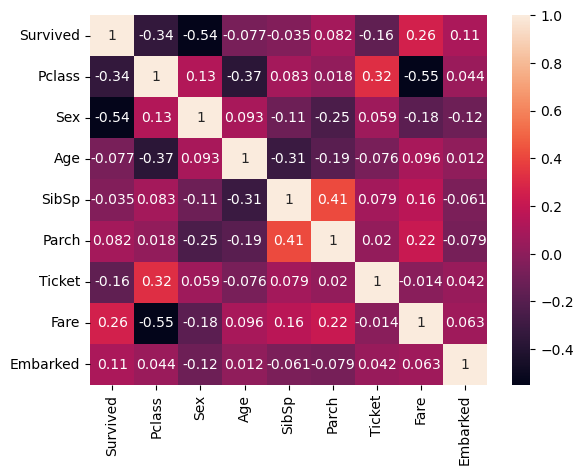

In [25]:
sns.heatmap(df.corr(),annot=True)

No need to remove ticket its quite significant.

In [26]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

now we have to fill null values in Age and Embarked

In [27]:
df['Age'].dtypes

dtype('float64')

Age column has float data so we can fill null values by use of mean.

In [28]:
X=np.mean(df['Age'])
X

29.69911764705882

In [29]:
df['Age']=df['Age'].fillna(X)

In [30]:
df['Age'].isnull().sum()

0

Now there is null values is zero

In [31]:
df['Embarked'].dtypes

dtype('float64')

here Embarked is in float but earlyer it is in object so we have to fill it by use of mod.

In [32]:
from scipy import stats
X=stats.mode(df['Embarked'])
X

ModeResult(mode=array([0.]), count=array([644]))

In [33]:
df['Embarked']=df['Embarked'].fillna(0)

In [34]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.0,1,0,523,7.2500,0.0
1,1,1,0,38.0,1,0,596,71.2833,1.0
2,1,3,0,26.0,0,0,669,7.9250,0.0
3,1,1,0,35.0,1,0,49,53.1000,0.0
4,0,3,1,35.0,0,0,472,8.0500,0.0


In [35]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

Now we observe that there are no null values

# EDA

1.Univariate Analysis

In [36]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')

0    549
1    342
Name: Survived, dtype: int64


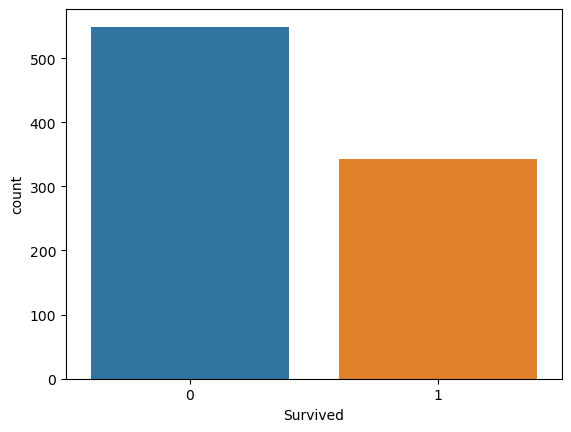

In [37]:
sns.countplot(df['Survived'])
print(df['Survived'].value_counts())

We can clearly see that the number of people survived is less than.

3    491
1    216
2    184
Name: Pclass, dtype: int64


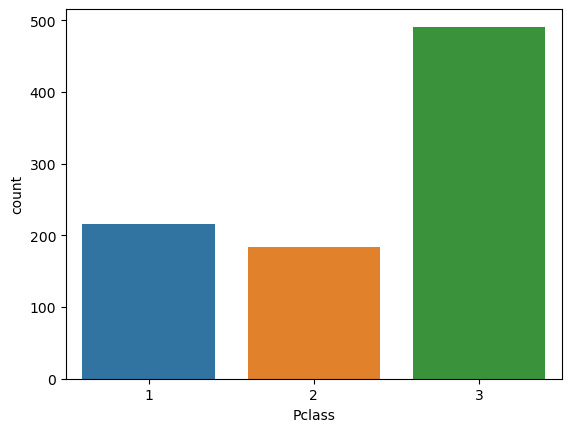

In [38]:
sns.countplot(df['Pclass'])
print(df['Pclass'].value_counts())

As we observe that most of person is in class 3

1    577
0    314
Name: Sex, dtype: int64


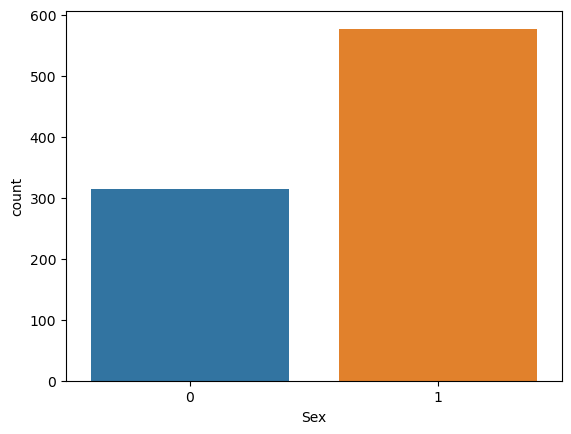

In [39]:
sns.countplot(df['Sex'])
print(df['Sex'].value_counts())

As we observe that majority of Sex is male compare to female

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


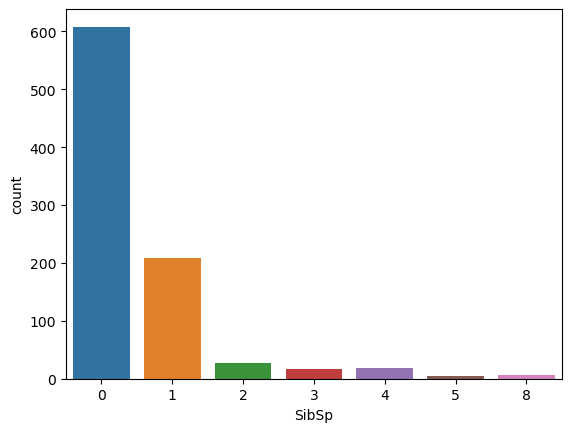

In [40]:
sns.countplot(df['SibSp'])
print(df['SibSp'].value_counts())

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


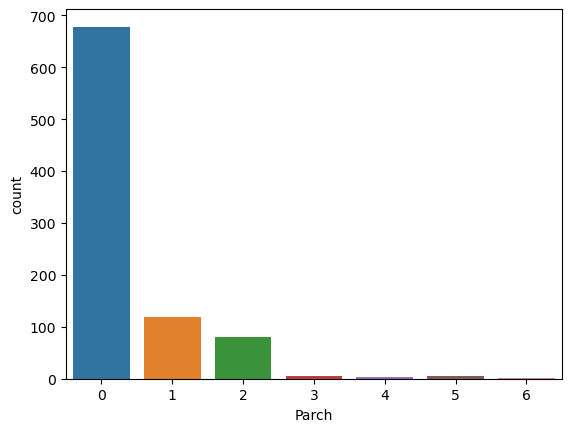

In [41]:
sns.countplot(df['Parch'])
print(df['Parch'].value_counts())

0.0    646
1.0    168
2.0     77
Name: Embarked, dtype: int64


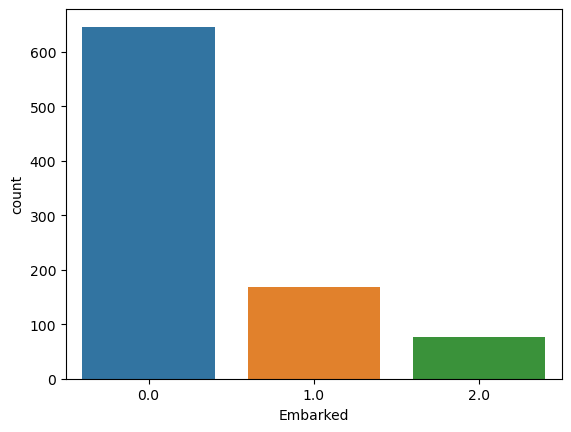

In [42]:
sns.countplot(df['Embarked'])
print(df['Embarked'].value_counts())

Children* less than 17 age

In [43]:
children=df.loc[df['Age']<17]

In [44]:
children.count()

Survived    100
Pclass      100
Sex         100
Age         100
SibSp       100
Parch       100
Ticket      100
Fare        100
Embarked    100
dtype: int64

1    55
0    45
Name: Survived, dtype: int64


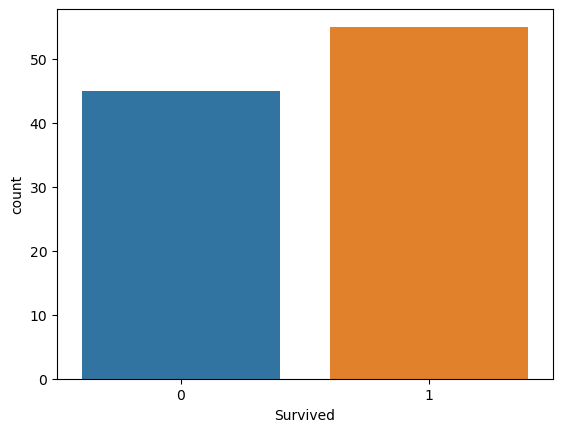

In [45]:
sns.countplot(children['Survived'])
print(children['Survived'].value_counts())

As we observe there were out of 100 55 child was survide and rest of died

1    51
0    49
Name: Sex, dtype: int64


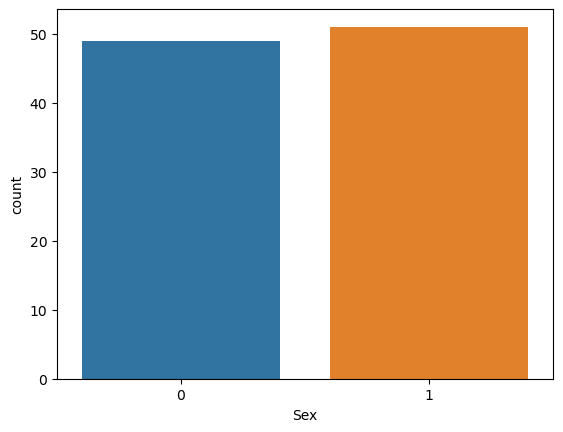

In [46]:
sns.countplot(children['Sex'])
print(children['Sex'].value_counts())

The ration of male and female in children is almost same.

*Middle_age* age between 17 to 35

In [47]:
middle17_35=df.loc[(df['Age']>17) & (df['Age']<35)]

In [48]:
middle17_35.count()

Survived    543
Pclass      543
Sex         543
Age         543
SibSp       543
Parch       543
Ticket      543
Fare        543
Embarked    543
dtype: int64

There were 543 people between the age 17 to 35.

0    356
1    187
Name: Survived, dtype: int64


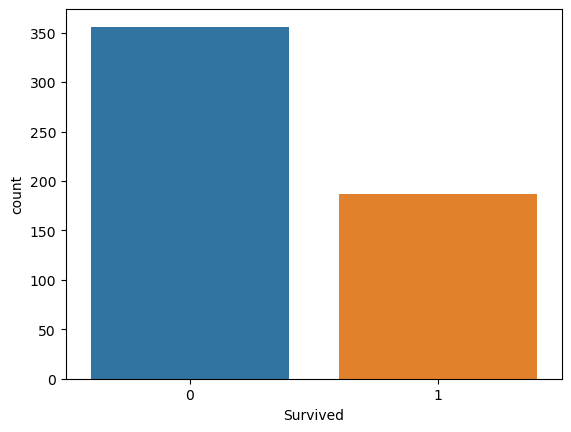

In [49]:
sns.countplot(middle17_35['Survived'])
print(middle17_35['Survived'].value_counts())

Most of the person is died in this age.

1    365
0    178
Name: Sex, dtype: int64


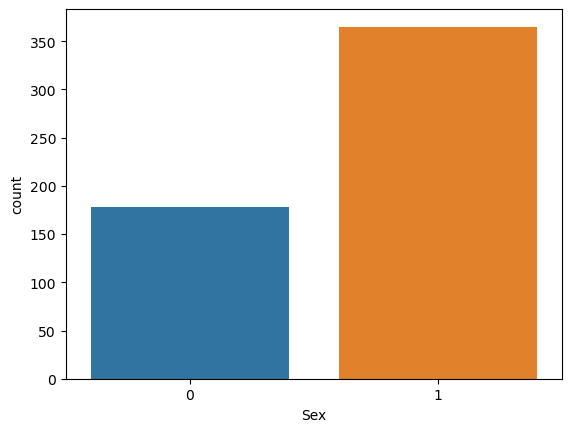

In [50]:
sns.countplot(middle17_35['Sex'])
print(middle17_35['Sex'].value_counts())

In this age more than female as compare to male

*Middle_age* age between 35 to 50

In [51]:
middle35_50=df.loc[(df['Age']>35) & (df['Age']<50)]

In [52]:
middle35_50.count()

Survived    143
Pclass      143
Sex         143
Age         143
SibSp       143
Parch       143
Ticket      143
Fare        143
Embarked    143
dtype: int64

There were 143 people between the age 35 to 50.

0    87
1    56
Name: Survived, dtype: int64


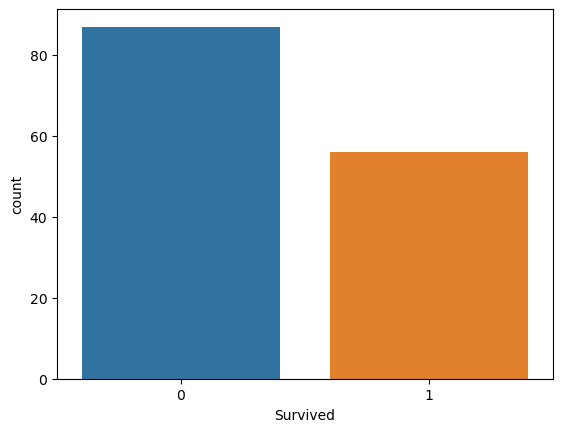

In [53]:
sns.countplot(middle35_50['Survived'])
print(middle35_50['Survived'].value_counts())

In this age only 56 person saved.

1    92
0    51
Name: Sex, dtype: int64


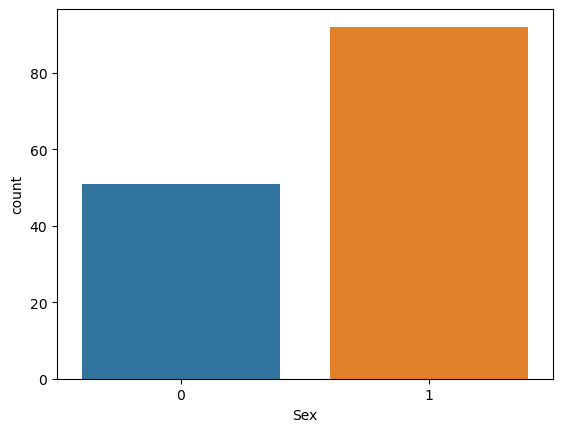

In [54]:
sns.countplot(middle35_50['Sex'])
print(middle35_50['Sex'].value_counts())

In this age most of male as compare to female

*oldage*

In [55]:
oldage=df.loc[(df['Age']>50)]

In [56]:
oldage.count()

Survived    64
Pclass      64
Sex         64
Age         64
SibSp       64
Parch       64
Ticket      64
Fare        64
Embarked    64
dtype: int64

There were 64 people who were more than 50 years of age.

0    42
1    22
Name: Survived, dtype: int64


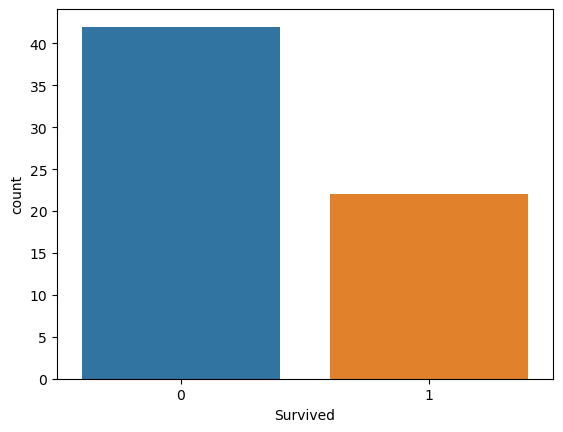

In [57]:
sns.countplot(oldage['Survived'])
print(oldage['Survived'].value_counts())

The ration of survived to died in this age is 22%

1    47
0    17
Name: Sex, dtype: int64


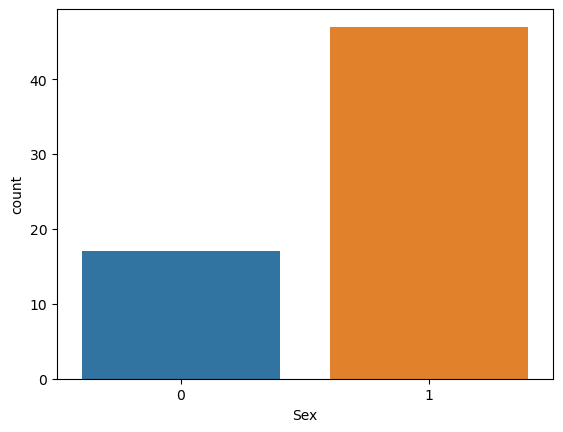

In [58]:
sns.countplot(oldage['Sex'])
print(oldage['Sex'].value_counts())

In this age most of male as compare to female

<AxesSubplot:xlabel='Age', ylabel='Count'>

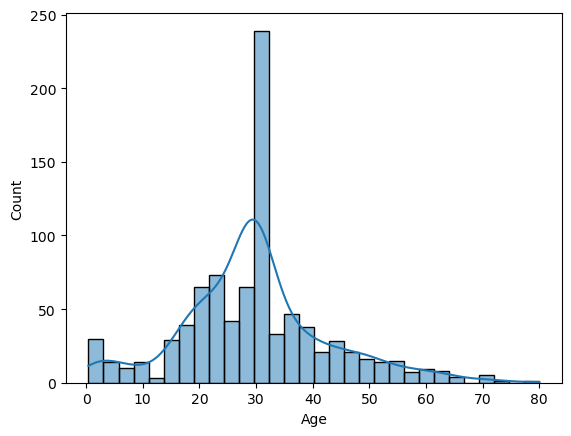

In [59]:
sns.histplot(df['Age'],kde=True)

As we observe that most of person is in 32 to 35 age.

<AxesSubplot:xlabel='Fare', ylabel='Density'>

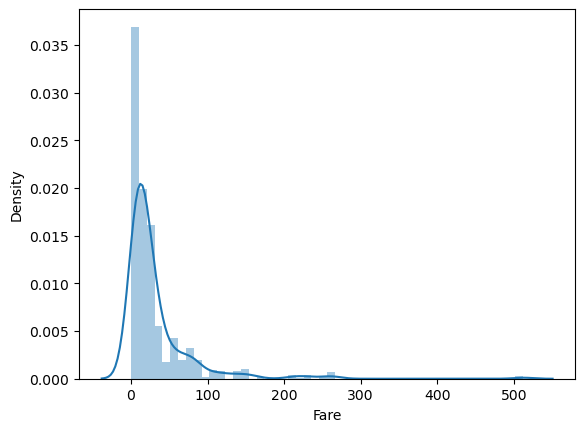

In [60]:
sns.distplot(df['Fare'])

In [61]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,338.528620,32.204208,0.361392
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,200.850657,49.693429,0.635673
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,158.500000,7.910400,0.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,337.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,519.500000,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,2.000000


here are outliers in Age,SibSp,Fare rest of are ok

# Multivariate Analysis

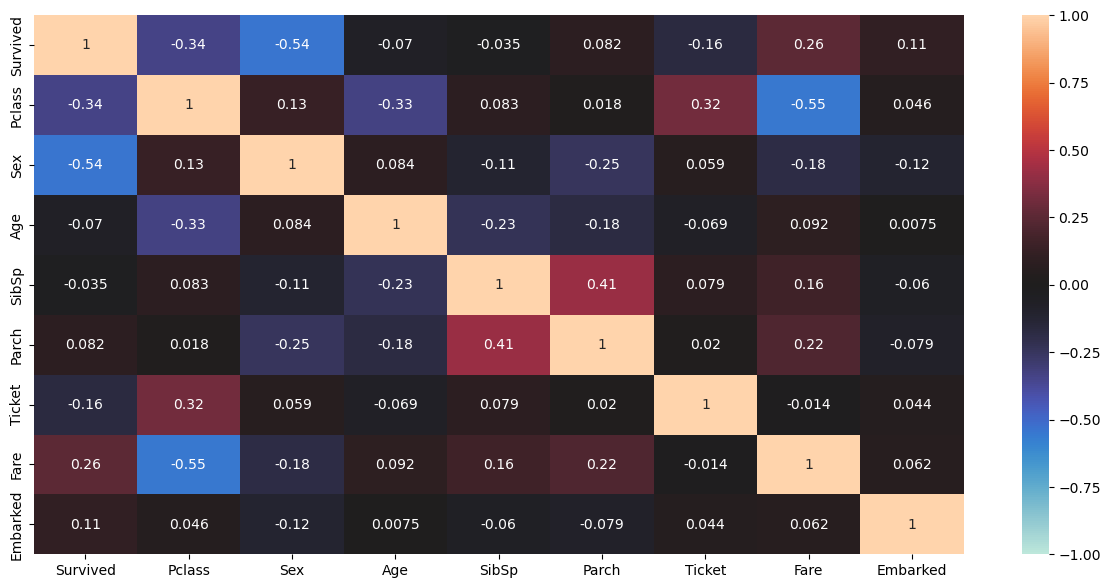

In [63]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0)
plt.show()

1.The columns Pclass, Sex,Fare,Ticket have significant affect over a person will be live or not.

2.There are some columns between which there is significant.

1.Pclass vs Fare

2.Pclass vs Age

3.Sex vs Parch

4.Age vs SibSp

5.Age vs Parch


6.Parch vs Sex

7.SibSp vs Parch

In [64]:
#Multivariate analysis by grouping

In [65]:
Target=df.groupby(df['Survived'])

In [66]:
live=Target.get_group(1)

In [67]:
dead=Target.get_group(0)

In [68]:
live.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,1,1,0,38.0,1,0,596,71.2833,1.0
2,1,3,0,26.0,0,0,669,7.9250,0.0
3,1,1,0,35.0,1,0,49,53.1000,0.0
8,1,3,0,27.0,0,2,344,11.1333,0.0
9,1,2,0,14.0,1,0,132,30.0708,1.0


In [69]:
dead.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.000000,1,0,523,7.2500,0.0
4,0,3,1,35.000000,0,0,472,8.0500,0.0
5,0,3,1,29.699118,0,0,275,8.4583,2.0
6,0,1,1,54.000000,0,0,85,51.8625,0.0
7,0,3,1,2.000000,3,1,395,21.0750,0.0


In [70]:
live.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,342.0,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000
mean,1.0,1.950292,0.318713,28.549778,0.473684,0.464912,296.678363,48.395408,0.447368
std,0.0,0.863321,0.466660,13.772498,0.708688,0.771712,218.165402,66.596998,0.651082
min,1.0,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,1.000000,0.000000,21.000000,0.000000,0.000000,94.250000,12.475000,0.000000
50%,1.0,2.000000,0.000000,29.699118,0.000000,0.000000,235.000000,26.000000,0.000000
75%,1.0,3.000000,1.000000,35.000000,1.000000,1.000000,539.000000,57.000000,1.000000
max,1.0,3.000000,1.000000,80.000000,4.000000,5.000000,680.000000,512.329200,2.000000


In [71]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [72]:
live['Pclass'].value_counts()

1    136
3    119
2     87
Name: Pclass, dtype: int64

1.From the above data we can say that 63% people who belonged to first class,47% who belonged to 2nd class and 24% of third class got survived.

In [73]:
live['Sex'].value_counts()

0    233
1    109
Name: Sex, dtype: int64

Out of total 342 people survived,69% of survived is womans and remaining is men.

<AxesSubplot:>

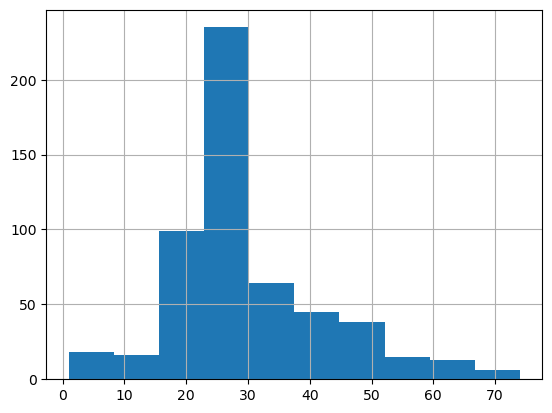

In [74]:
dead['Age'].hist(grid=True)

Most of the people who died were belonged to age group between 20 to 30.

In [75]:
live['SibSp'].value_counts()

0    210
1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64

In [76]:
live.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,342.0,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000
mean,1.0,1.950292,0.318713,28.549778,0.473684,0.464912,296.678363,48.395408,0.447368
std,0.0,0.863321,0.466660,13.772498,0.708688,0.771712,218.165402,66.596998,0.651082
min,1.0,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,1.000000,0.000000,21.000000,0.000000,0.000000,94.250000,12.475000,0.000000
50%,1.0,2.000000,0.000000,29.699118,0.000000,0.000000,235.000000,26.000000,0.000000
75%,1.0,3.000000,1.000000,35.000000,1.000000,1.000000,539.000000,57.000000,1.000000
max,1.0,3.000000,1.000000,80.000000,4.000000,5.000000,680.000000,512.329200,2.000000


In [77]:
dead.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,549.0,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,0.0,2.531876,0.852459,30.415100,0.553734,0.329690,364.599271,22.117887,0.307832
std,0.0,0.735805,0.354968,12.457370,1.288399,0.823166,184.732277,31.388207,0.620478
min,0.0,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.0,2.000000,1.000000,23.000000,0.000000,0.000000,221.000000,7.854200,0.000000
50%,0.0,3.000000,1.000000,29.699118,0.000000,0.000000,370.000000,10.500000,0.000000
75%,0.0,3.000000,1.000000,35.000000,1.000000,0.000000,518.000000,26.000000,0.000000
max,0.0,3.000000,1.000000,74.000000,8.000000,6.000000,680.000000,263.000000,2.000000


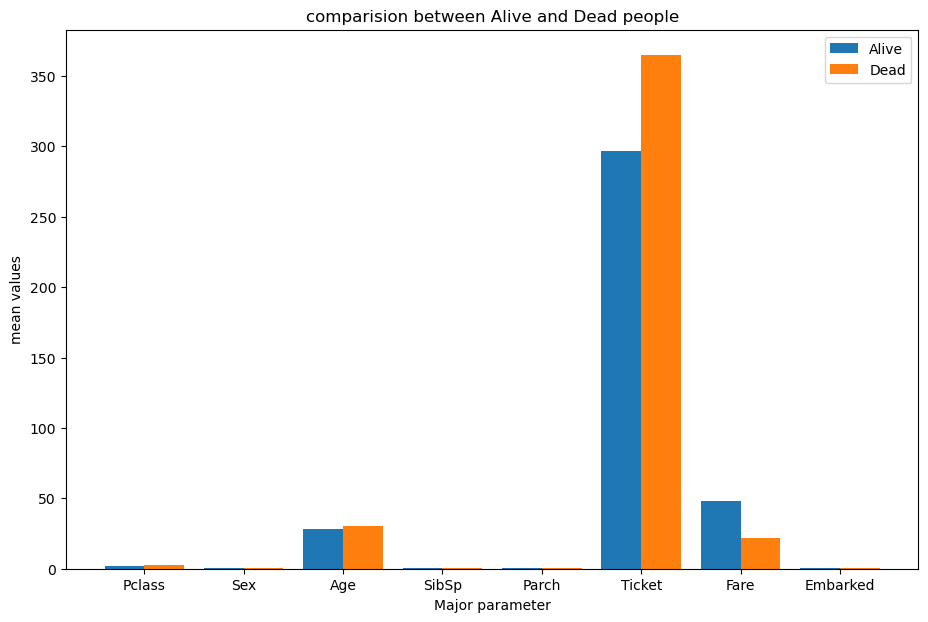

In [78]:
X =['Pclass','Sex','Age','SibSp','Parch','Ticket','Fare','Embarked']
yp = [1.950292,0.318713,28.343690,0.473684,0.464912,296.678363,48.395408,0.45000]
yq = [2.531876,0.852459,30.626179,0.553734,0.329690,364.599271,22.117887,0.307832]
plt.figure(figsize=(11,7))  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, yp, 0.4, label = 'Alive')
plt.bar(X_axis + 0.2, yq, 0.4, label = 'Dead')
  
plt.xticks(X_axis, X)
plt.xlabel("Major parameter")
plt.ylabel("mean values")
plt.title("comparision between Alive and Dead people")
plt.legend()
plt.show()


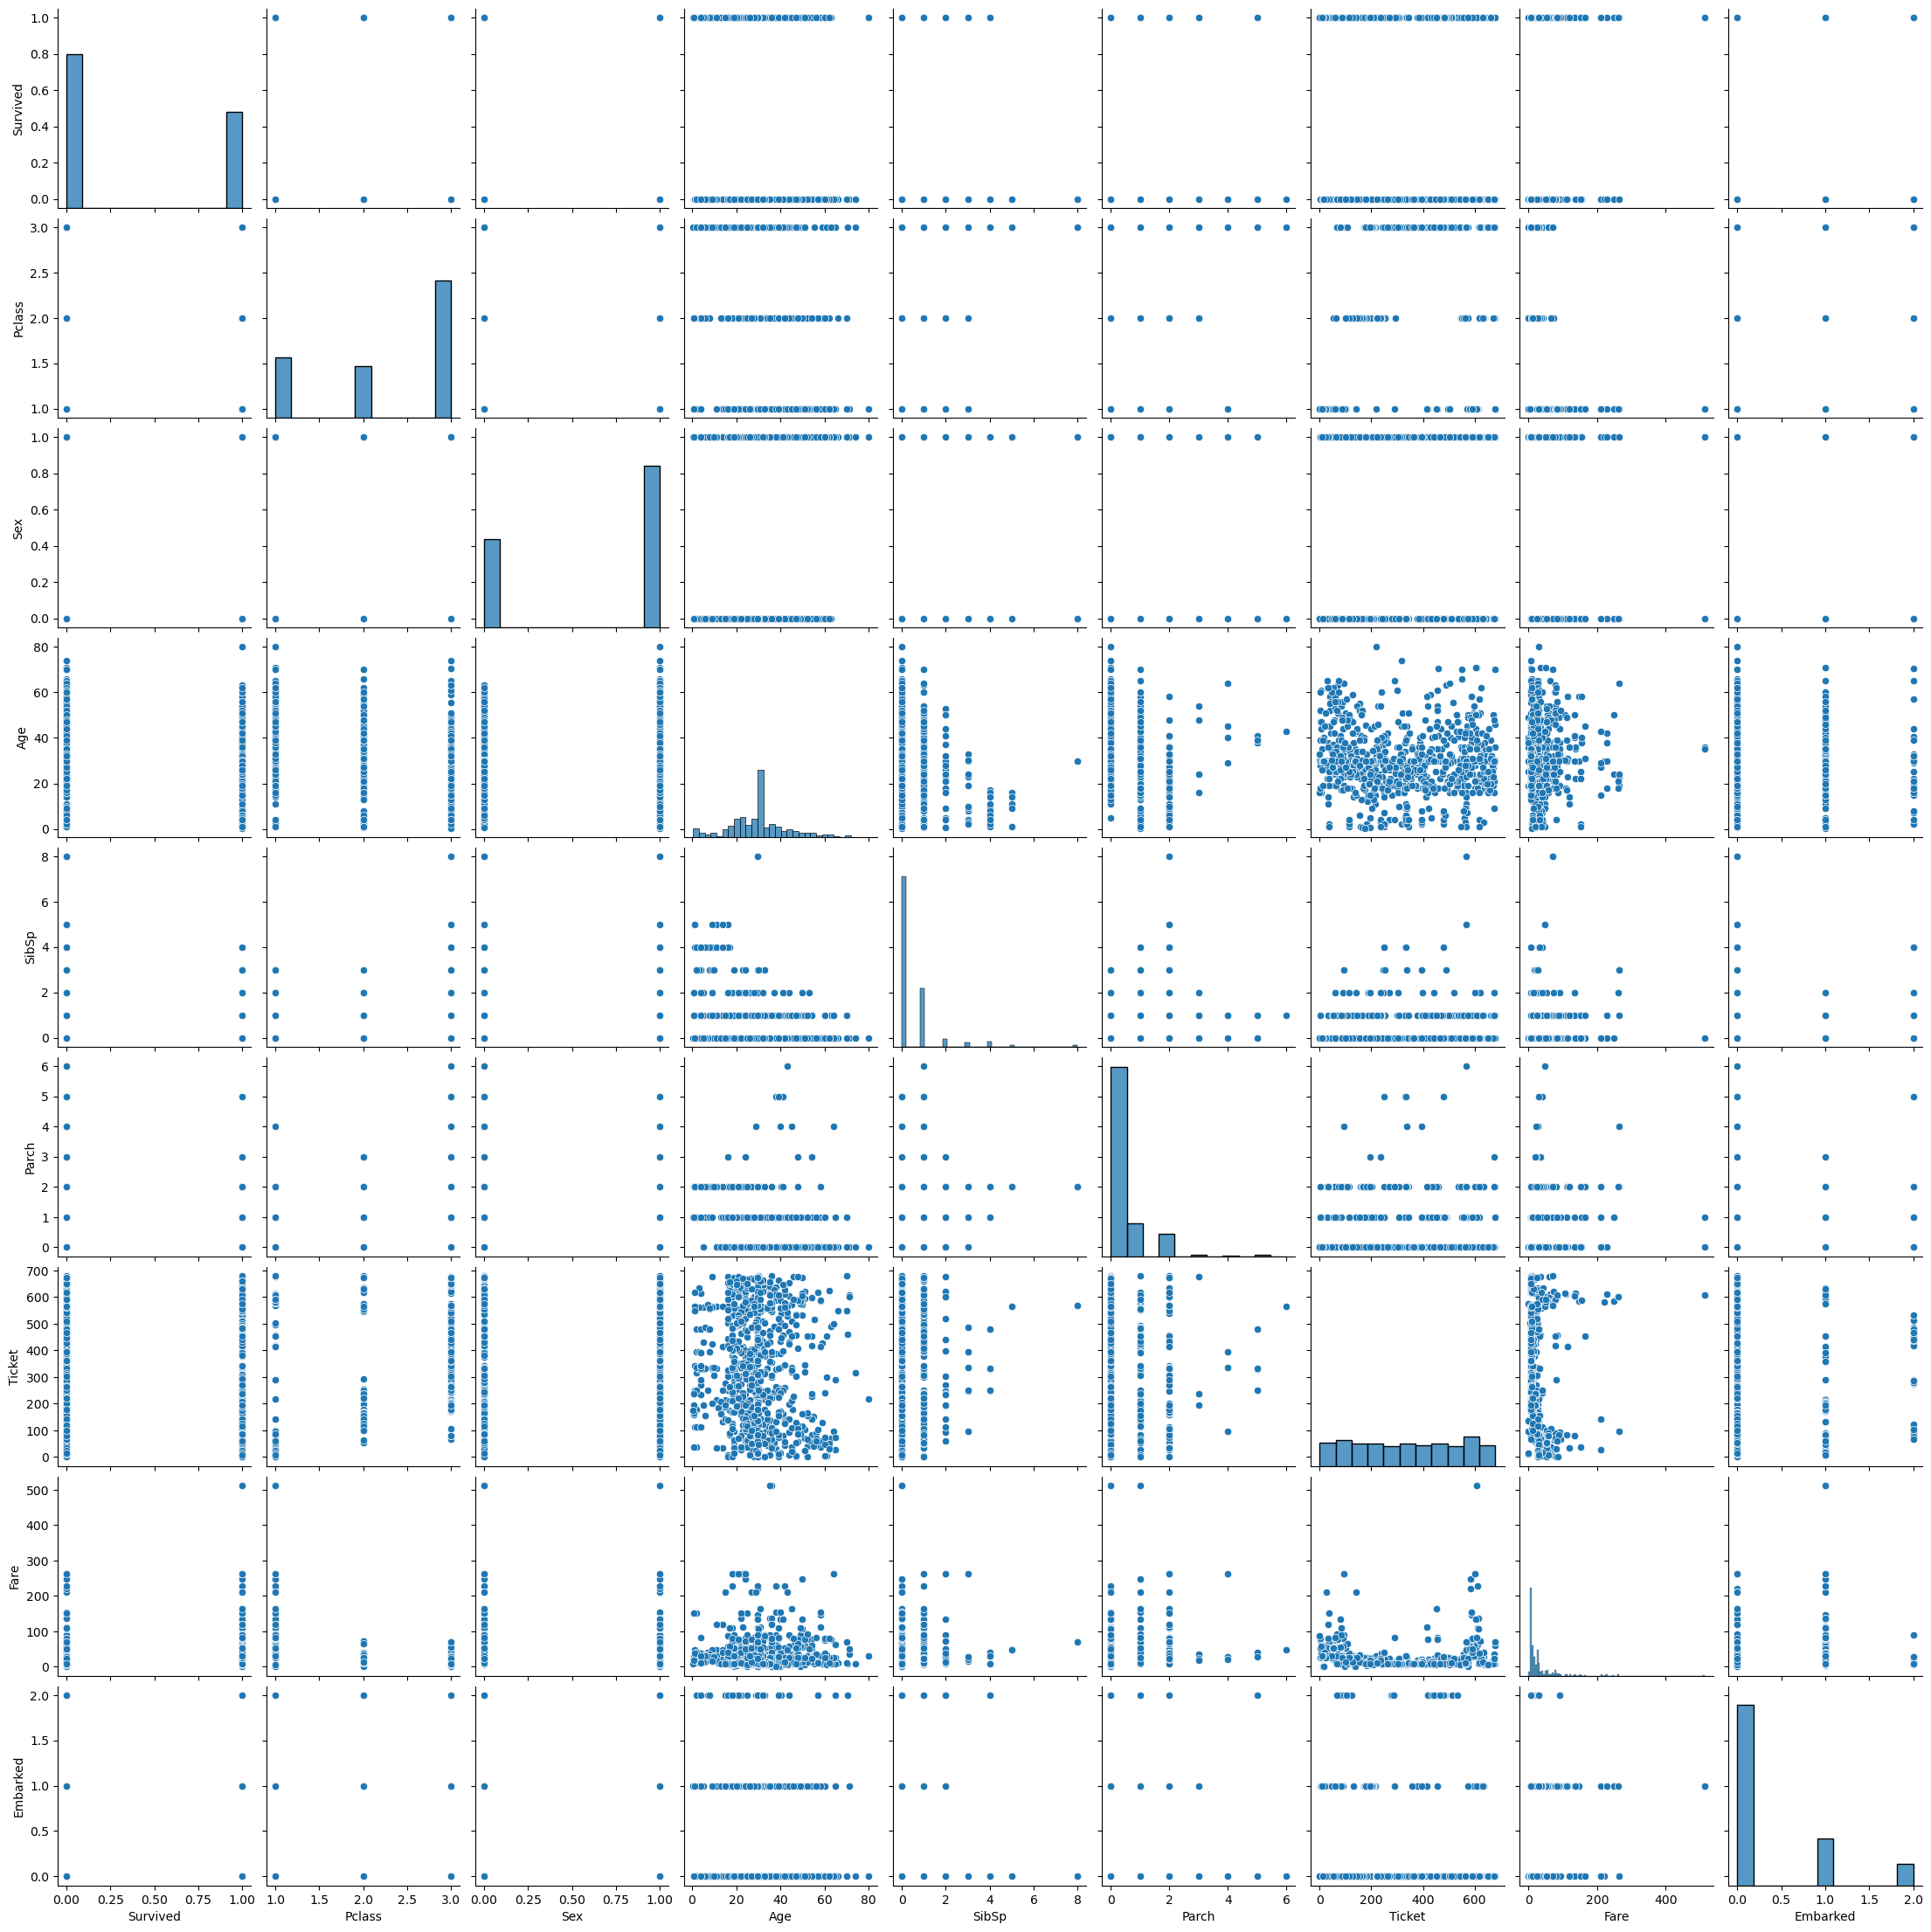

In [79]:
sns.pairplot(df)

# Bi variate analysis

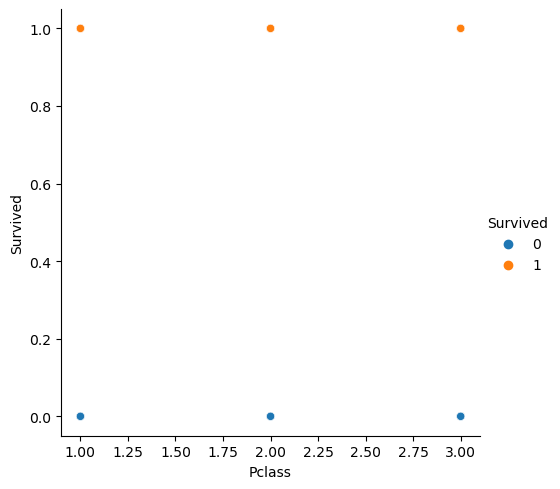

In [80]:
sns.relplot(x='Pclass',y='Survived',hue='Survived',data=df)

We already know that From the above data we can say that 63% people who belonged to first class,47% who belonged to 2nd class and 24% of third class got survived.

In [81]:
live['Sex'].value_counts()

0    233
1    109
Name: Sex, dtype: int64

74% of the womans were survived and only 18% of mens got survived.

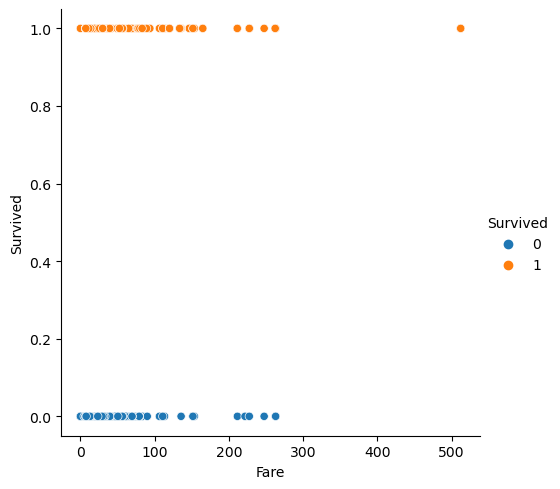

In [82]:
sns.relplot(x='Fare',y='Survived',hue='Survived',data=df)

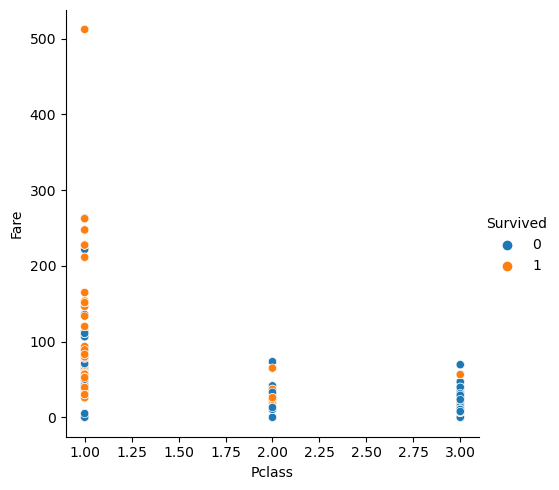

In [83]:
sns.relplot(x='Pclass',y='Fare',hue='Survived',data=df)

Most of the people who were survived belongs to 1st class.

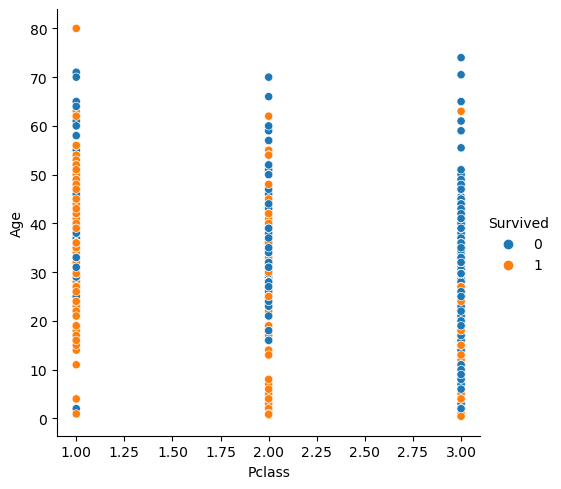

In [84]:
sns.relplot(x='Pclass',y='Age',hue='Survived',data=df)

From the above observations we can see children belonged to class 1 and 2 under the age 10 got survived.

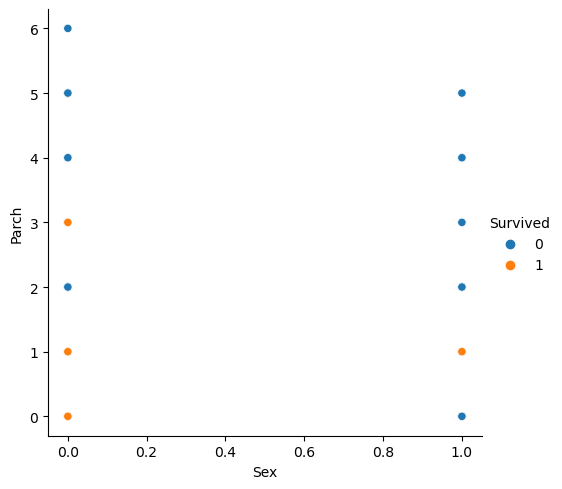

In [85]:
sns.relplot(x='Sex',y='Parch',hue='Survived',data=df)

We can clearly see that for the value of the parch 1 there is no death .

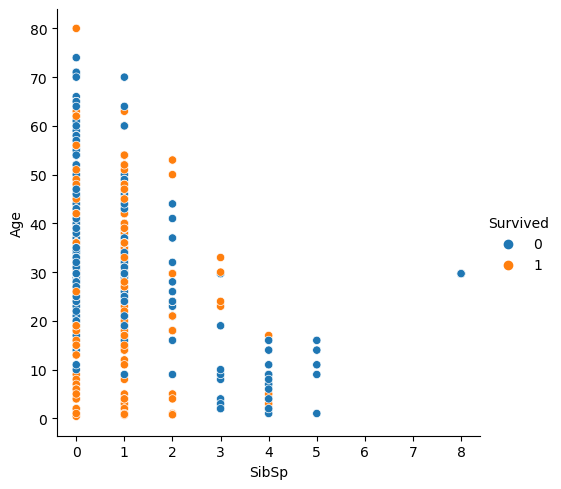

In [86]:
sns.relplot(x='SibSp',y='Age',hue='Survived',data=df)

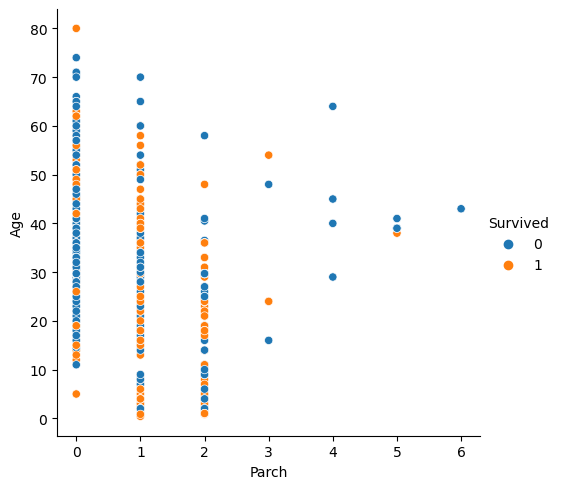

In [87]:
sns.relplot(x='Parch',y='Age',hue='Survived',data=df)

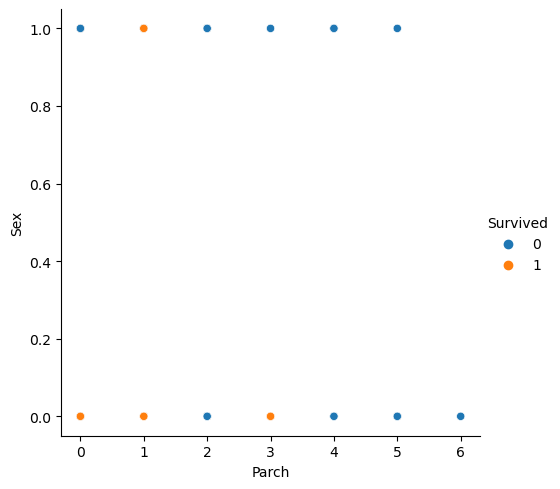

In [89]:
sns.relplot(x='Parch',y='Sex',hue='Survived',data=df)

Womans belonged to parch 0,1 and 3 were alive

In [90]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,338.528620,32.204208,0.361392
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,200.850657,49.693429,0.635673
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,158.500000,7.910400,0.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,337.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,519.500000,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,2.000000


PassengerID


KeyError: 'PassengerId'

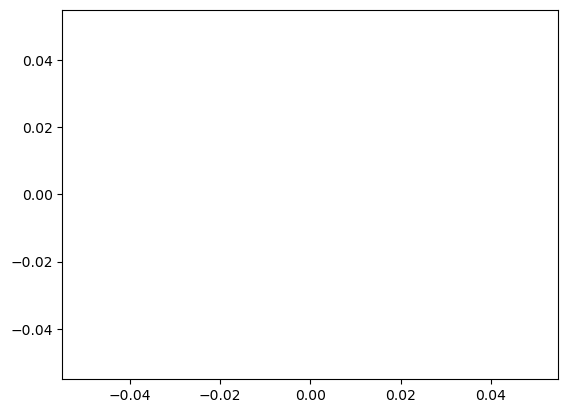

In [92]:
print('PassengerID')
plt.plot()
plt.plot(figsize=(7,9))
sns.boxplot(df['PassengerId'])
plt.show()

Survived


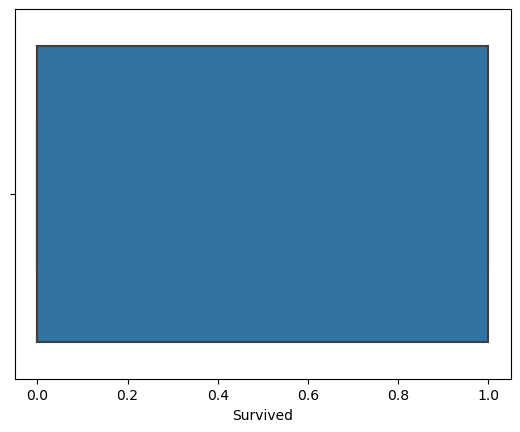

In [93]:
print('Survived')
plt.plot()
plt.plot(figsize=(7,9))
sns.boxplot(df['Survived'])
plt.show()

SibSp


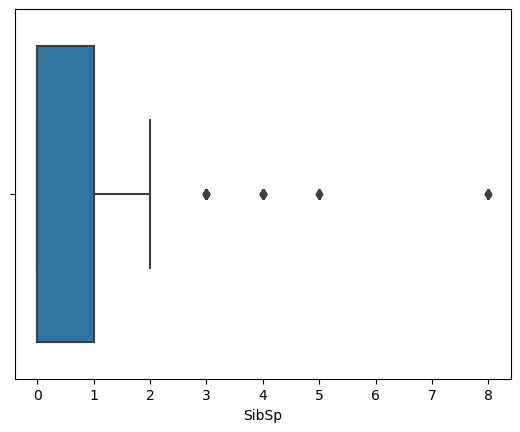

In [94]:
print('SibSp')
plt.plot()
plt.plot(figsize=(7,9))
sns.boxplot(df['SibSp'])
plt.show()

Parch


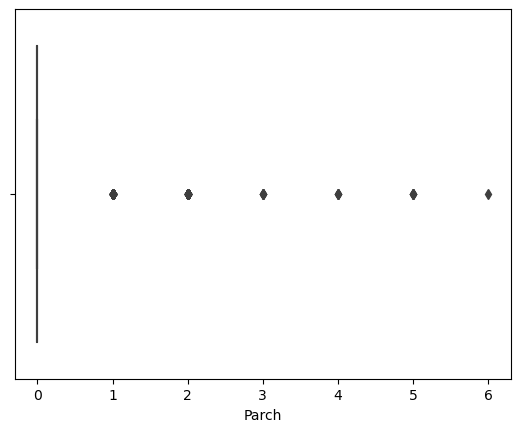

In [95]:
print('Parch')
plt.plot()
plt.plot(figsize=(7,9))
sns.boxplot(df['Parch'])
plt.show()

Fare


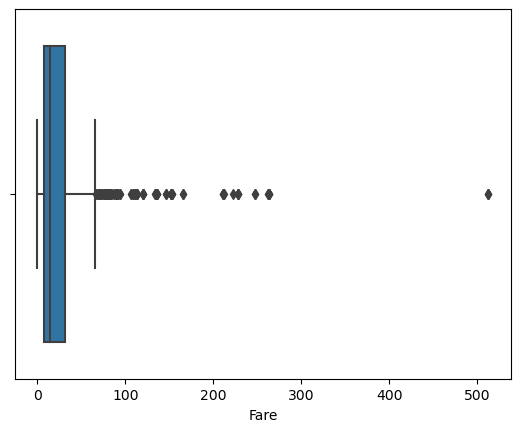

In [96]:
print('Fare')
plt.plot()
plt.plot(figsize=(7,9))
sns.boxplot(df['Fare'])
plt.show()

# Removing the Outliers

In [97]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
dfz=df[(z<3).all(axis=1)]
print('percentage of loss of data by zscore is :',(df.shape[0]-dfz.shape[0])/df.shape[0])

percentage of loss of data by zscore is : 0.07968574635241302


# Splitting the variables

In [98]:
x=dfz.drop('Survived',axis=1)

In [99]:
y=dfz['Survived']

In [100]:
x.shape

(820, 8)

In [101]:
y.shape

(820,)

In [102]:
x.head(2)

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,1,22.0,1,0,523,7.2500,0.0
1,1,0,38.0,1,0,596,71.2833,1.0


In [103]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# Skewness removal

In [104]:
x.skew()

Pclass     -0.632242
Sex        -0.664152
Age         0.318314
SibSp       1.979577
Parch       2.122629
Ticket      0.039240
Fare        2.318761
Embarked    1.552592
dtype: float64

Except Ticket and Age every other variable should be treated for skewness.

In [105]:
#lets find the best method for skewness
from scipy.stats import skew
from scipy.stats import boxcox

def skee(a):
    model=[np.sqrt(a),np.log(a),stats.boxcox(a)[0]]
    print('original skewness is:',a.skew())
    print('\n')
    for m in model:
        x=m
        print(skew(m))
        print('\n')

In [106]:
skee(x['Pclass'])

original skewness is: -0.6322423392231357


-0.7495251621323258


-0.8678163428344764


-0.47045908306404327




In [107]:
x['Pclass']=stats.boxcox(x['Pclass'])[0]

In [108]:
x['Sex']=np.cbrt(x['Sex'])
x['SibSp']=np.cbrt(x['SibSp'])
x['Parch']=np.cbrt(x['Parch'])
x['Fare']=np.cbrt(x['Fare'])
x['Fare']=np.cbrt(x['Fare'])
x['Embarked']=np.cbrt(x['Embarked'])

In [109]:
x.skew()

Pclass     -0.471322
Sex        -0.664152
Age         0.318314
SibSp       1.018770
Parch       1.643259
Ticket      0.039240
Fare       -3.480437
Embarked    1.079646
dtype: float64

In [110]:
x['Sex']=np.sqrt(x['Sex'])
x['Parch']=np.cbrt(x['Parch'])
x['SibSp']=np.cbrt(x['SibSp'])
x['Embarked']=np.sqrt(x['Embarked'])

# Building the model

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [112]:
#Finding the best random_state
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
add=AdaBoostClassifier()
rf=RandomForestClassifier()

In [113]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.23,random_state=i)
    mod=lg
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('the best accuracy is ',maxAccu,'on random state',maxRS)

the best accuracy is  0.8624338624338624 on random state 14


In [114]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.23,random_state=14)

In [115]:
print('x_train shape is :',x_train.shape)
print('\n')
print('x_test shape is :',x_test.shape)
print('\n')
print('y_train shape is :',y_train.shape)
print('\n')
print('y_test shape is :',y_test.shape)

x_train shape is : (631, 8)


x_test shape is : (189, 8)


y_train shape is : (631,)


y_test shape is : (189,)


In [116]:
#Logistic  Regression
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score is',round((accuracy_score(y_test,pred)),3))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score is 0.862
[[99  8]
 [18 64]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.88       107
           1       0.89      0.78      0.83        82

    accuracy                           0.86       189
   macro avg       0.87      0.85      0.86       189
weighted avg       0.86      0.86      0.86       189



In [117]:
#GaussianNB
gnb.fit(x_train,y_train)
pred=gnb.predict(x_test)
print('accuracy score is',round((accuracy_score(y_test,pred)),3))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score is 0.836
[[92 15]
 [16 66]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       107
           1       0.81      0.80      0.81        82

    accuracy                           0.84       189
   macro avg       0.83      0.83      0.83       189
weighted avg       0.84      0.84      0.84       189



In [118]:
#svc
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print('accuracy score is',round((accuracy_score(y_test,pred)),3))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score is 0.693
[[97 10]
 [48 34]]
              precision    recall  f1-score   support

           0       0.67      0.91      0.77       107
           1       0.77      0.41      0.54        82

    accuracy                           0.69       189
   macro avg       0.72      0.66      0.65       189
weighted avg       0.71      0.69      0.67       189



In [119]:
#dtc
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print('accuracy score is',round((accuracy_score(y_test,pred)),3))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score is 0.81
[[89 18]
 [18 64]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       107
           1       0.78      0.78      0.78        82

    accuracy                           0.81       189
   macro avg       0.81      0.81      0.81       189
weighted avg       0.81      0.81      0.81       189



In [120]:
#knn
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('accuracy score is',round((accuracy_score(y_test,pred)),3))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score is 0.651
[[88 19]
 [47 35]]
              precision    recall  f1-score   support

           0       0.65      0.82      0.73       107
           1       0.65      0.43      0.51        82

    accuracy                           0.65       189
   macro avg       0.65      0.62      0.62       189
weighted avg       0.65      0.65      0.64       189



In [121]:
#rf
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('accuracy score is',round((accuracy_score(y_test,pred)),3))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score is 0.878
[[101   6]
 [ 17  65]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       107
           1       0.92      0.79      0.85        82

    accuracy                           0.88       189
   macro avg       0.89      0.87      0.87       189
weighted avg       0.88      0.88      0.88       189



In [122]:
#rf for train
rf.fit(x_train,y_train)
predd=rf.predict(x_train)
print('accuracy score is',round((accuracy_score(y_train,predd)),3))
print(confusion_matrix(y_train,predd))
print(classification_report(y_train,predd))

accuracy score is 0.997
[[392   1]
 [  1 237]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       393
           1       1.00      1.00      1.00       238

    accuracy                           1.00       631
   macro avg       1.00      1.00      1.00       631
weighted avg       1.00      1.00      1.00       631



# Cross Validation Score

In [123]:
models=[lg,gnb,svc,dtc,knn,rf]
for m in models:
    
    score=cross_val_score(m,x,y,cv=5)
    print(m,'score is:')
    print(round((score.mean()),3))
    print('\n')

LogisticRegression() score is:
0.793


GaussianNB() score is:
0.776


SVC() score is:
0.661


DecisionTreeClassifier() score is:
0.765


KNeighborsClassifier() score is:
0.632


RandomForestClassifier() score is:
0.821




Now go with RandomForestClassifier

# Hyper parameter tuning

In [124]:
grid_param={
    
    'max_features':['auto', 'sqrt'],
    'min_samples_split' :[2, 5, 10],
    'min_samples_leaf' : [1, 2, 4],
    'bootstrap' :[True, False],
    'criterion':['gini','entropy']
}

gd_sr=GridSearchCV(estimator=rf,
                  param_grid=grid_param,
                  scoring='accuracy',
                  cv=5)

gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'bootstrap': True, 'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}
0.8402439024390244


In [125]:
rf1=RandomForestClassifier(n_estimators=100,criterion='entropy',max_features='auto',min_samples_split=5,min_samples_leaf=2,bootstrap=True)


In [126]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.23,random_state=14)
rf1.fit(x_train,y_train)
pred=rf1.predict(x_test)
print('accuracy score through rf is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through rf is 
0.884
classification report is
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       107
           1       0.93      0.79      0.86        82

    accuracy                           0.88       189
   macro avg       0.89      0.87      0.88       189
weighted avg       0.89      0.88      0.88       189

confusion matrix is
[[102   5]
 [ 17  65]]




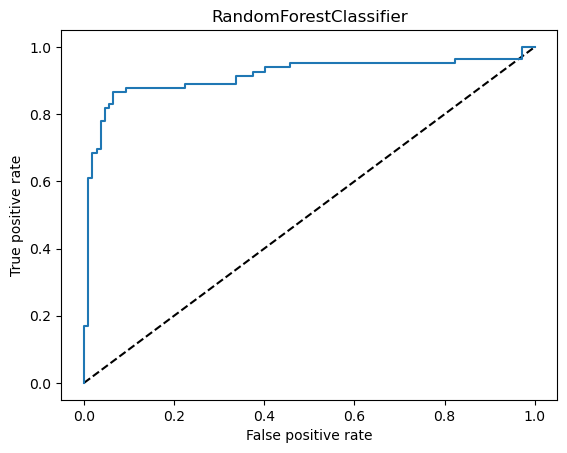

0.8729769774333258

In [127]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=rf1.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()
auc_score=roc_auc_score(y_test,rf1.predict(x_test))
auc_score

# Saving the model

In [128]:
import joblib
joblib.dump(rf1,'Titanic.obj')

['Titanic.obj']